# Simulation 14: Batch Size Sweep

TJ Kim
4/25/20

Find performance based on batch size:
- 15 users, 8 servers, 16 ts
- Jobs last entire duration
- Resources, limited

Batch sizes to sweep:
- 1,2,4,6,8,12,16

In [1]:
from IPython.core.debugger import set_trace

# Import Generic Classes
import numpy as np
import copy
import pickle
import random

# Import All Custom Classes
import os, sys
sys.path.append(os.path.pardir+"/classes")
sys.path.append(os.path.pardir+"/solvers")
sys.path.append(os.path.pardir+"/one_mobility")
sys.path.append(os.path.curdir + "/sim_store/sim14")
sys.path.append(os.path.pardir+"/crawdad_mobility")


from Server import *
from User import *
from Link import *
from Job import *
from Migration_Plans import *
from Cost_Recordings import *

from sim14_setting import *
from load_crawdad_usr import *

# Import Solver Classes
from Optim_PlanGenerator import *
from SeqGreedy_PlanGenerator import *
from Myopic_PlanGenerator import *
from Naive_PlanGenerator import *

### Run Simulations

First set batch settings and num trials.

In [2]:
batch_settings = [1,2,4,8,12]
batch_cost_stores = {}
for val in batch_settings:
    batch_cost_stores[val] = []

In [3]:
# Load Crawdad data
# Load All 12 users and trim their info
db_names = []
for i in range(1,2):
    db_names += ['LifeMap_GS'+str(i)+'.db']

db = []
for name in db_names:
    name = '/home/tkim/CMU/MEC_research/crawdad_mobility/' + name
    df,trace = load_usr(name)
    db += [trace]

In [4]:
num_trials = 10
i = 0

while i < num_trials:
    print("Trial Number:",i)
    
    try:
        # Make Users shared amongst all batch values
        users, servers, links, jobs, sim_param = simulation_setting(db)
        curr_list = []

        for val in batch_settings:
            print("batch val:",val)

            refresh_rate = [val,0]
            refresh = True

            for j in range(len(jobs)):
                jobs[j].info_from_usr(users[j],refresh_rate,refresh)

            # Make Batch Prob

            print("batch_prob...")
            Batch_prob = SeqGreedy_PlanGenerator(users, servers, links, jobs, sim_param)
            Batch_plan = Migration_Plans(users,jobs,sim_param)
            Batch_plan.from_seq_greedy(Batch_prob)
            print("done!")

            curr_list += [Batch_plan]

        for j in range(len(curr_list)):
            val = batch_settings[j]
            batch_cost_stores[val] += [Cost_Recordings(curr_list[j])]

        i += 1
    except:
        continue

Trial Number: 0
batch val: 1
batch_prob...
Struck Placement Resource (j,s,t): 7 1 0
Struck Placement Resource (j,s,t): 7 1 1
done!
batch val: 2
batch_prob...
Struck Placement Resource (j,s,t): 7 1 0
Struck Placement Resource (j,s,t): 7 1 1
Struck Placement Resource (j,s,t): 7 1 2
done!
batch val: 4
batch_prob...
Struck Placement Resource (j,s,t): 7 1 0
Struck Placement Resource (j,s,t): 7 1 1
Struck Placement Resource (j,s,t): 7 1 2
Struck Placement Resource (j,s,t): 7 1 3
Struck Placement Resource (j,s,t): 7 1 4
Struck Placement Resource (j,s,t): 6 5 5
Struck Placement Resource (j,s,t): 8 3 5
done!
batch val: 8
batch_prob...
Struck Placement Resource (j,s,t): 9 1 0
Struck Placement Resource (j,s,t): 9 1 1
Struck Placement Resource (j,s,t): 9 1 2
Struck Placement Resource (j,s,t): 9 1 3
Struck Placement Resource (j,s,t): 9 1 4
Struck Placement Resource (j,s,t): 9 1 5
Struck Placement Resource (j,s,t): 9 1 6
Struck Placement Resource (j,s,t): 9 1 7
Struck Placement Resource (j,s,t): 9 1

Struck Placement Resource (j,s,t): 9 3 0
Struck Placement Resource (j,s,t): 9 3 1
Struck Placement Resource (j,s,t): 9 3 2
Struck Placement Resource (j,s,t): 9 3 3
Struck Placement Resource (j,s,t): 9 3 4
Struck Placement Resource (j,s,t): 7 5 5
Struck Placement Resource (j,s,t): 9 5 5
Struck Placement Resource (j,s,t): 9 5 6
Struck Placement Resource (j,s,t): 9 5 7
Struck Placement Resource (j,s,t): 9 5 8
Struck Placement Resource (j,s,t): 9 3 5
Struck Placement Resource (j,s,t): 9 3 6
Struck Placement Resource (j,s,t): 9 3 7
Struck Placement Resource (j,s,t): 9 3 8
Struck Placement Resource (j,s,t): 9 0 5
Struck Placement Resource (j,s,t): 9 0 6
Struck Placement Resource (j,s,t): 9 0 7
Struck Placement Resource (j,s,t): 9 0 8
Struck Placement Resource (j,s,t): 9 1 5
Struck Placement Resource (j,s,t): 9 1 6
Struck Placement Resource (j,s,t): 9 5 4
not enough resources, simulation broken
Trial Number: 3
batch val: 1
batch_prob...
Struck Placement Resource (j,s,t): 8 1 0
Struck Placemen

Struck Placement Resource (j,s,t): 8 2 5
Struck Placement Resource (j,s,t): 8 2 6
Struck Placement Resource (j,s,t): 8 2 7
Struck Placement Resource (j,s,t): 8 2 8
Struck Placement Resource (j,s,t): 8 5 5
Struck Placement Resource (j,s,t): 8 5 6
Struck Placement Resource (j,s,t): 8 5 7
Struck Placement Resource (j,s,t): 8 5 8
Struck Placement Resource (j,s,t): 8 3 5
Struck Placement Resource (j,s,t): 3 2 9
Struck Placement Resource (j,s,t): 3 2 10
Struck Placement Resource (j,s,t): 3 2 11
Struck Placement Resource (j,s,t): 7 5 9
Struck Placement Resource (j,s,t): 7 5 10
Struck Placement Resource (j,s,t): 7 5 11
Struck Placement Resource (j,s,t): 9 5 9
Struck Placement Resource (j,s,t): 9 5 10
Struck Placement Resource (j,s,t): 9 5 11
Struck Placement Resource (j,s,t): 9 3 9
Struck Placement Resource (j,s,t): 9 3 10
Struck Placement Resource (j,s,t): 9 3 11
done!
batch val: 8
batch_prob...
Struck Placement Resource (j,s,t): 6 3 0
Struck Placement Resource (j,s,t): 6 3 1
Struck Placement

Struck Placement Resource (j,s,t): 0 2 7
Struck Placement Resource (j,s,t): 1 3 7
Struck Placement Resource (j,s,t): 8 3 7
Struck Placement Resource (j,s,t): 8 3 8
Struck Placement Resource (j,s,t): 8 5 7
Struck Placement Resource (j,s,t): 8 5 8
Struck Placement Resource (j,s,t): 9 5 7
Struck Placement Resource (j,s,t): 9 5 8
Struck Placement Resource (j,s,t): 9 2 7
Struck Placement Resource (j,s,t): 3 5 9
Struck Placement Resource (j,s,t): 6 5 9
Struck Placement Resource (j,s,t): 6 5 10
Struck Placement Resource (j,s,t): 6 3 10
Struck Placement Resource (j,s,t): 6 5 8
not enough resources, simulation broken
Trial Number: 4
batch val: 1
batch_prob...
done!
batch val: 2
batch_prob...
done!
batch val: 4
batch_prob...
done!
batch val: 8
batch_prob...
Struck Placement Resource (j,s,t): 4 5 9
done!
batch val: 12
batch_prob...
Struck Placement Resource (j,s,t): 9 5 4
Struck Placement Resource (j,s,t): 9 5 5
Struck Placement Resource (j,s,t): 9 5 6
Struck Placement Resource (j,s,t): 9 5 7
Str

done!
batch val: 4
batch_prob...
Struck Placement Resource (j,s,t): 7 3 0
Struck Placement Resource (j,s,t): 7 3 1
Struck Placement Resource (j,s,t): 7 3 2
Struck Placement Resource (j,s,t): 7 3 3
Struck Placement Resource (j,s,t): 7 3 4
Struck Placement Resource (j,s,t): 9 3 0
Struck Placement Resource (j,s,t): 9 3 1
Struck Placement Resource (j,s,t): 9 3 2
Struck Placement Resource (j,s,t): 9 3 3
Struck Placement Resource (j,s,t): 9 3 4
Struck Placement Resource (j,s,t): 9 5 0
Struck Placement Resource (j,s,t): 9 5 1
Struck Placement Resource (j,s,t): 9 5 2
Struck Placement Resource (j,s,t): 9 5 3
Struck Placement Resource (j,s,t): 9 5 4
Struck Placement Resource (j,s,t): 2 5 5
done!
batch val: 8
batch_prob...
Struck Placement Resource (j,s,t): 7 3 0
Struck Placement Resource (j,s,t): 7 3 1
Struck Placement Resource (j,s,t): 7 3 2
Struck Placement Resource (j,s,t): 7 3 3
Struck Placement Resource (j,s,t): 7 3 4
Struck Placement Resource (j,s,t): 7 3 5
Struck Placement Resource (j,s,t

Struck Placement Resource (j,s,t): 6 2 5
Struck Placement Resource (j,s,t): 8 2 5
Struck Placement Resource (j,s,t): 8 2 6
Struck Placement Resource (j,s,t): 8 2 7
Struck Placement Resource (j,s,t): 8 2 8
Struck Placement Resource (j,s,t): 8 5 7
Struck Placement Resource (j,s,t): 8 2 4
not enough resources, simulation broken
Trial Number: 7
batch val: 1
batch_prob...
Struck Placement Resource (j,s,t): 5 2 0
Struck Placement Resource (j,s,t): 5 2 1
Struck Placement Resource (j,s,t): 1 5 8
Struck Placement Resource (j,s,t): 1 5 9
Struck Placement Resource (j,s,t): 8 5 11
done!
batch val: 2
batch_prob...
Struck Placement Resource (j,s,t): 5 2 0
Struck Placement Resource (j,s,t): 5 2 1
Struck Placement Resource (j,s,t): 5 2 2
Struck Placement Resource (j,s,t): 0 5 5
Struck Placement Resource (j,s,t): 0 4 5
Struck Placement Resource (j,s,t): 0 4 7
Struck Placement Resource (j,s,t): 1 5 9
Struck Placement Resource (j,s,t): 8 5 11
done!
batch val: 4
batch_prob...
Struck Placement Resource (j,

done!
batch val: 4
batch_prob...
Struck Placement Resource (j,s,t): 9 0 0
Struck Placement Resource (j,s,t): 9 0 1
Struck Placement Resource (j,s,t): 9 0 2
Struck Placement Resource (j,s,t): 9 0 3
Struck Placement Resource (j,s,t): 9 0 4
Struck Placement Resource (j,s,t): 4 1 5
Struck Placement Resource (j,s,t): 4 1 6
Struck Placement Resource (j,s,t): 4 1 7
Struck Placement Resource (j,s,t): 4 1 8
Struck Placement Resource (j,s,t): 6 0 5
Struck Placement Resource (j,s,t): 6 0 6
Struck Placement Resource (j,s,t): 6 0 7
Struck Placement Resource (j,s,t): 6 0 8
Struck Placement Resource (j,s,t): 4 1 9
Struck Placement Resource (j,s,t): 4 1 10
Struck Placement Resource (j,s,t): 4 1 11
Struck Placement Resource (j,s,t): 6 0 9
Struck Placement Resource (j,s,t): 7 0 9
Struck Placement Resource (j,s,t): 7 0 10
Struck Placement Resource (j,s,t): 7 0 11
done!
batch val: 8
batch_prob...
Struck Placement Resource (j,s,t): 9 0 0
Struck Placement Resource (j,s,t): 9 4 3
Struck Placement Resource (j

### Plot a single line recording the total cumulative cost across time

x axis - batch size
y axis - cost (dollars)

In [5]:
costs = []

for i in range(len(batch_settings)):
    curr_cost = 0
    val = batch_settings[i]
    cost_recording_list = batch_cost_stores[val]
    
    curr_cost = []
    
    for cost_rec in cost_recording_list:
        curr_cost += [cost_rec.all_cost_cumulative["total_cost"][-1]]
    
    costs += [np.mean(curr_cost)]

([<matplotlib.axis.XTick at 0x7f2392e7c430>,
 <a list of 7 Text major ticklabel objects>)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


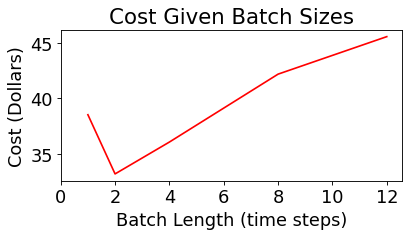

In [6]:
# Collect the correct costs
# Plot the plot
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



# Set Font Size Limitations
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

figure(num=None, figsize=(5.5, 2.5), dpi=80, facecolor='w', edgecolor='k')

batch_settings = [1,2,4,8,12]
costs2 = [45.5, 45.2, 45.5, 46.2, 50.8]

fig = plt.plot(batch_settings, costs, 'r-')

plt.ylabel('Cost (Dollars)')
plt.xlabel('Batch Length (time steps)')
plt.title('Cost Given Batch Sizes')
plt.xticks(range(0,13,2))